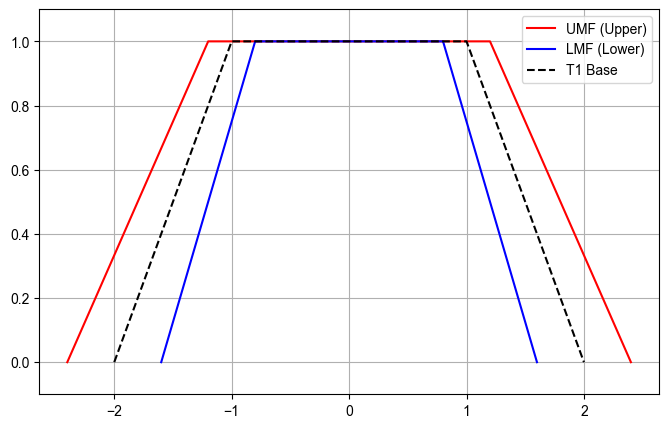

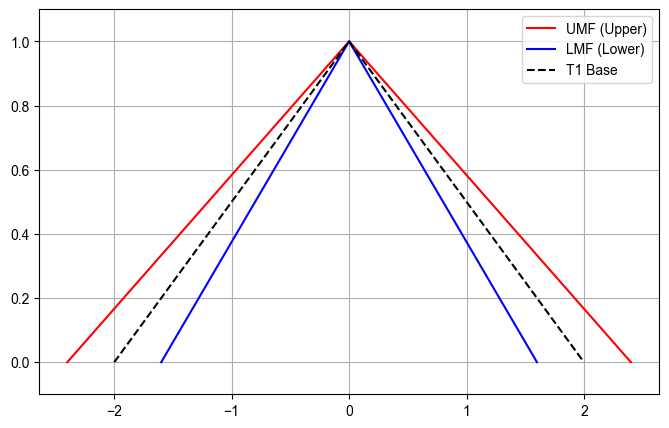

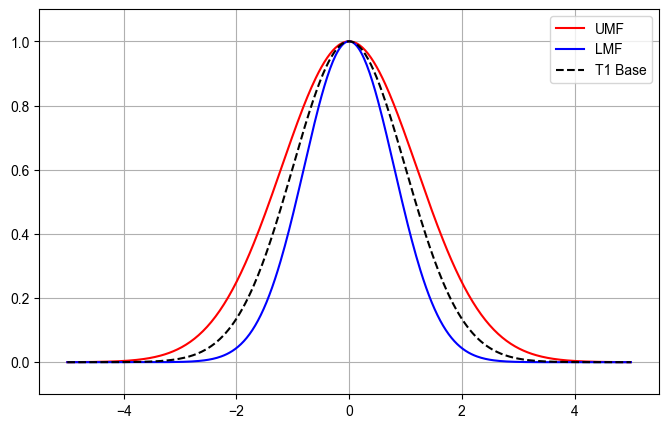

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_trapezoidal(center=0, width=2, support_width_multiplier=2, uncertainty_factor=0.2):
    # Base trapezoid (T1)
    half_width = width / 2
    half_support = (width * support_width_multiplier) / 2
    
    left_t1, left_top_t1, right_top_t1, right_t1 = (
        center - half_support, center - half_width,
        center + half_width, center + half_support
    )
    
    # UMF
    umf_width = width * (1 + uncertainty_factor)
    umf_half_width = umf_width / 2
    umf_half_support = (umf_width * support_width_multiplier) / 2
    left_upper, left_top_upper, right_top_upper, right_upper = (
        center - umf_half_support, center - umf_half_width,
        center + umf_half_width, center + umf_half_support
    )
    
    # LMF
    lmf_width = width * (1 - uncertainty_factor)
    lmf_half_width = lmf_width / 2
    lmf_half_support = (lmf_width * support_width_multiplier) / 2
    left_lower, left_top_lower, right_top_lower, right_lower = (
        center - lmf_half_support, center - lmf_half_width,
        center + lmf_half_width, center + lmf_half_support
    )
    
    plt.rcParams['font.family'] = 'Arial'

    # Plot
    plt.figure(figsize=(8,5))
    # UMF
    plt.plot([left_upper, left_top_upper, right_top_upper, right_upper],
             [0, 1, 1, 0], label="UMF (Upper)", color="red")
    # LMF
    plt.plot([left_lower, left_top_lower, right_top_lower, right_lower],
             [0, 1, 1, 0], label="LMF (Lower)", color="blue")
    # T1
    plt.plot([left_t1, left_top_t1, right_top_t1, right_t1],
             [0, 1, 1, 0], "--", label="T1 Base", color="black")
    
    # plt.title("Type-2 Trapezoidal MF")
    plt.ylim(-0.1, 1.1)
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_triangular(center=0, base_width=4, uncertainty_factor=0.2):
    # Base (T1)
    half_width = base_width / 2
    left_t1, right_t1 = center - half_width, center + half_width
    
    # UMF
    umf_half_width = (base_width * (1 + uncertainty_factor)) / 2
    left_upper, right_upper = center - umf_half_width, center + umf_half_width
    
    # LMF
    lmf_half_width = (base_width * (1 - uncertainty_factor)) / 2
    left_lower, right_lower = center - lmf_half_width, center + lmf_half_width

    plt.rcParams['font.family'] = 'Arial'

    # Plot
    plt.figure(figsize=(8,5))
    # UMF
    plt.plot([left_upper, center, right_upper], [0, 1, 0],
             label="UMF (Upper)", color="red")
    # LMF
    plt.plot([left_lower, center, right_lower], [0, 1, 0],
             label="LMF (Lower)", color="blue")
    # T1
    plt.plot([left_t1, center, right_t1], [0, 1, 0],
             "--", label="T1 Base", color="black")
    
    # plt.title("Type-2 Triangular MF")
    plt.ylim(-0.1, 1.1)
    plt.legend()
    plt.grid(True)
    plt.show()
    
def plot_gaussian(center=0, sigma=1.0, uncertainty_factor=0.2, x_range=(-5,5)):
    x = np.linspace(x_range[0], x_range[1], 400)

    # --- T1 Base Gaussian ---
    y_base = np.exp(-0.5 * ((x - center) / sigma) ** 2)

    # --- UMF (wider sigma) ---
    sigma_upper = sigma * (1 + uncertainty_factor)
    y_umf = np.exp(-0.5 * ((x - center) / sigma_upper) ** 2)

    # --- LMF (narrower sigma) ---
    sigma_lower = max(sigma * (1 - uncertainty_factor), 1e-6)
    y_lmf = np.exp(-0.5 * ((x - center) / sigma_lower) ** 2)

    plt.rcParams['font.family'] = 'Arial'

    # --- Plot ---
    plt.figure(figsize=(8,5))
    plt.plot(x, y_umf, label=f"UMF", color="red")
    plt.plot(x, y_lmf, label=f"LMF", color="blue")
    plt.plot(x, y_base, "--", label=f"T1 Base", color="black")

    # plt.title("Type-2 Gaussian MF")
    plt.ylim(-0.1, 1.1)
    plt.legend()
    plt.grid(True)
    plt.show()


# Draw both
plot_trapezoidal(center=0, width=2, support_width_multiplier=2, uncertainty_factor=0.2)
plot_triangular(center=0, base_width=4, uncertainty_factor=0.2)
plot_gaussian(center=0, sigma=1.0, uncertainty_factor=0.2)
